# Load rheology data

If you have a google account you can run this documentation notebook [Open in colab](https://colab.research.google.com/github/rheopy/rheofit/blob/master/docs/source/load_data.ipynb)

In [0]:
from IPython.display import clear_output
!pip install git+https://github.com/rheopy/rheofit.git --upgrade
clear_output()

In [0]:
import rheofit
import numpy as np
import pandas as pd
import pybroom as pb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

The module rheofit.rheodata provides a class to store structured rheology data.

We initially focus loading datafile exported by the trios software in two possible format:

* Excel format - as structured by the trios software with the multitab export opion
* Rheoml format [rheoml link](https://www.tomcoat.com/IUPAC/index.php?Page=XML%20Repository)

## Import data from Multitab excel (assuming format exported by TA Trios)

In [0]:
# Download example of xls file format
import requests

url = 'https://github.com/rheopy/rheofit/raw/master/docs/source/_static/Flow_curve_example.xls'
r = requests.get(url, allow_redirects=True)
with open('Flow_curve_example.xls', 'wb') as file:
    file.write(r.content)

In [4]:
excel_file=pd.ExcelFile('Flow_curve_example.xls')
excel_file.sheet_names

['Details', 'Flow sweep - 1', 'Flow sweep - 2']

In [0]:
flow_curve=rheofit.rheodata.rheology_data('Flow_curve_example.xls')

In [6]:
flow_curve.filename

'Flow_curve_example.xls'

In [7]:
flow_curve.Details

,Filename,Flow_curve_example
0,Instrument name,5333-0138
1,Operator,NaN
2,rundate,2018-12-11 00:00:00
3,proceduresegments,Flow sweep#Flow sweep


In [8]:
flow_curve[0]

('Flow sweep - 1',
     index    Stress  Shear rate  ...  Step time  Temperature  Normal stress
 0     1.0  0.005880    0.009983  ...     33.315       24.994       -25.6271
 1     2.0  0.008049    0.012570  ...     44.440       24.997       -26.1219
 2     3.0  0.010172    0.015820  ...     53.508       25.000       -25.0472
 3     4.0  0.012829    0.019934  ...     62.558       24.993       -25.1450
 4     5.0  0.015199    0.025083  ...     69.590       25.000       -24.7538
 5     6.0  0.017969    0.031625  ...     76.633       25.005       -24.6068
 6     7.0  0.020827    0.039800  ...     83.694       25.002       -24.4271
 7     8.0  0.023693    0.050126  ...     90.740       25.005       -24.7584
 8     9.0  0.026287    0.063106  ...     97.778       25.001       -24.7708
 9    10.0  0.028844    0.079445  ...    104.824       24.995       -25.3449
 10   11.0  0.031365    0.100010  ...    111.873       25.001       -24.9789
 11   12.0  0.033939    0.125897  ...    118.938       25

In [9]:
print(flow_curve[0][0])
flow_curve[0][1]

Flow sweep - 1


,index,Stress,Shear rate,Viscosity,Step time,Temperature,Normal stress
0,1.0,0.005880,0.009983,0.588953,33.315,24.994,-25.6271
1,2.0,0.008049,0.012570,0.640324,44.440,24.997,-26.1219
2,3.0,0.010172,0.015820,0.643003,53.508,25.000,-25.0472
3,4.0,0.012829,0.019934,0.643584,62.558,24.993,-25.1450
4,5.0,0.015199,0.025083,0.605968,69.590,25.000,-24.7538
5,6.0,0.017969,0.031625,0.568177,76.633,25.005,-24.6068
6,7.0,0.020827,0.039800,0.523307,83.694,25.002,-24.4271
7,8.0,0.023693,0.050126,0.472677,90.740,25.005,-24.7584
8,9.0,0.026287,0.063106,0.416561,97.778,25.001,-24.7708
9,10.0,0.028844,0.079445,0.363072,104.824,24.995,-25.3449


In [10]:
print(flow_curve[1][0])
flow_curve[1][1]

Flow sweep - 2


,index,Shear rate,Stress,Viscosity,Step time,Temperature,Normal stress
0,1.0,100.000000,0.785576,0.007856,7.035,24.994,-25.8372
1,2.0,79.433600,0.667926,0.008409,14.122,25.001,-25.5272
2,3.0,63.095600,0.570374,0.009040,21.198,24.996,-26.0631
3,4.0,50.118600,0.488046,0.009738,28.277,24.992,-25.5495
4,5.0,39.810900,0.418776,0.010519,35.368,25.000,-25.1221
5,6.0,31.622800,0.362210,0.011454,42.464,25.000,-24.7939
6,7.0,25.118800,0.312748,0.012451,49.513,24.997,-25.0236
7,8.0,19.952600,0.272681,0.013666,56.564,24.997,-24.8406
8,9.0,15.849000,0.237302,0.014973,63.607,24.995,-24.2895
9,10.0,12.589200,0.208064,0.016527,70.656,25.000,-24.5804


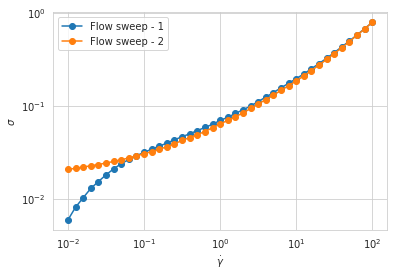

In [11]:
# In summary
flow_curve=rheofit.rheodata.rheology_data('Flow_curve_example.xls')
for (label,data) in flow_curve:
  plt.loglog('Shear rate','Stress',data=data,marker='o',label=label)
  plt.xlabel('$\dot\gamma$')
  plt.ylabel('$\sigma$')
  plt.legend()

In [12]:
flow_curve.tidy

,index,Stress,Shear rate,Viscosity,Step time,Temperature,Normal stress,Stepnum,stepname,filename
0,1.0,0.005880,0.009983,0.588953,33.315,24.994,-25.6271,0,Flow sweep - 1,Flow_curve_example.xls
1,2.0,0.008049,0.012570,0.640324,44.440,24.997,-26.1219,0,Flow sweep - 1,Flow_curve_example.xls
2,3.0,0.010172,0.015820,0.643003,53.508,25.000,-25.0472,0,Flow sweep - 1,Flow_curve_example.xls
3,4.0,0.012829,0.019934,0.643584,62.558,24.993,-25.1450,0,Flow sweep - 1,Flow_curve_example.xls
4,5.0,0.015199,0.025083,0.605968,69.590,25.000,-24.7538,0,Flow sweep - 1,Flow_curve_example.xls
5,6.0,0.017969,0.031625,0.568177,76.633,25.005,-24.6068,0,Flow sweep - 1,Flow_curve_example.xls
6,7.0,0.020827,0.039800,0.523307,83.694,25.002,-24.4271,0,Flow sweep - 1,Flow_curve_example.xls
7,8.0,0.023693,0.050126,0.472677,90.740,25.005,-24.7584,0,Flow sweep - 1,Flow_curve_example.xls
8,9.0,0.026287,0.063106,0.416561,97.778,25.001,-24.7708,0,Flow sweep - 1,Flow_curve_example.xls
9,10.0,0.028844,0.079445,0.363072,104.824,24.995,-25.3449,0,Flow sweep - 1,Flow_curve_example.xls


In [26]:
import altair as alt

alt.Chart(flow_curve.tidy).mark_point().encode(
    alt.X('Shear rate', scale=alt.Scale(type='log')),
    alt.Y('Stress', scale=alt.Scale(type='log')),
    color='stepname')

#.interactive()

alt.Chart(...)

## Import data from Rheoml

In [0]:
# Download example of xls file format
import requests

url = 'https://raw.githubusercontent.com/rheopy/rheofit/master/docs/source/_static/Flow_curve_example.xml'
r = requests.get(url, allow_redirects=True)
with open('Flow_curve_example.xml', 'wb') as file:
    file.write(r.content)

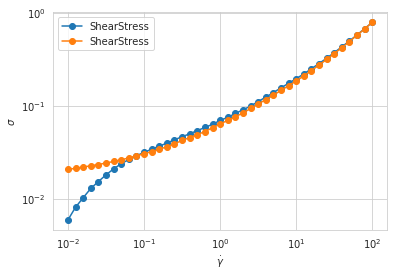

In [0]:
# In summary from xml (rheoml schema)
# to do - add to rheology_data class the option to import from xml
# Solve naming problem for shear stress and shear rate

steps_table_list=rheofit.rheodata.dicttopanda(rheofit.rheodata.get_data_dict('Flow_curve_example.xml'))
for data in steps_table_list:
  plt.loglog('ShearRate','ShearStress',data=data,marker='o')
  plt.xlabel('$\dot\gamma$')
  plt.ylabel('$\sigma$')
  plt.legend()